In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
!ls

Lift1.ipynb                    parameter1.csv
Lifting 50 times.csv           rise front 50 times.csv
Lifting first test.csv         rise side 50 times.csv
Punching 50 times.csv          shaking 50 times.csv
Punching first test.csv        shoulder pressing 50 times.csv


In [44]:
def get_fft(x,f_s=50):
    '''
    Function to convert raw timeseries signal to Fourier domain
    x:raw_signal
    f_s=sampling frequency if f_s=50 means sample 50 points per second from the temporal data
    
    plots a folded and scaled frequency plot of the signal
    and returns the frequency spectrum datframe of the signal
    '''
    
    n = len(x)
    fft_x = np.fft.fft(x) # gives the complex representation of each point

    # Find all the frequencies in the FFT
    freqs = np.fft.fftfreq(n, d=1/f_s)
    
    # Plot the folded and scaled frequency plot
    half_n = int(np.ceil(n/2.0))
    fft_x_half = (2.0 / n) * fft_x[:half_n]
    fft_x_half=np.abs(fft_x_half)
    freq_half = freqs[:half_n]
    plt.figure(figsize=(10,5))
    plt.plot(freq_half, fft_x_half)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.show()
    spectrum = pd.DataFrame({'frequency (Hz)': freq_half,'magnitude': fft_x_half,})
    return spectrum

In [106]:
#data=pd.read_csv('Lifting first test.csv')
data0=pd.read_csv('Punching 50 times.csv')

In [6]:
print(data.shape)
#data.head(20)
#data

#Ax1 大臂x轴上accelerometer的值
#Gy2 小臂上gyroscope上的值
#R 绕x轴的角度
#P 绕Y轴
#Y 绕z轴

(2246, 19)


In [19]:
dataa=data
dataa[' Ax1']+=1


In [31]:
data.columns.values

array(['Time', ' Ax1', ' Ay1', ' Az1', ' Gx1', ' Gy1', ' Gz1', ' R1',
       ' P1', ' Y1', ' Ax2', ' Ay2', ' Az2', ' Gx2', ' Gy2', ' Gz2', ' R2',
       ' P2', ' Y2'], dtype=object)

In [44]:
data=pd.read_csv('read_data4.csv')

/Users/Dayou/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


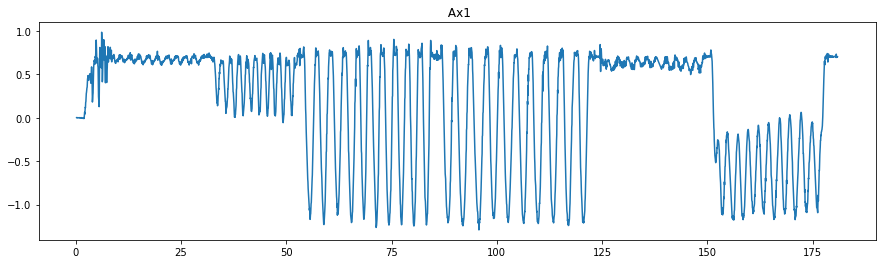

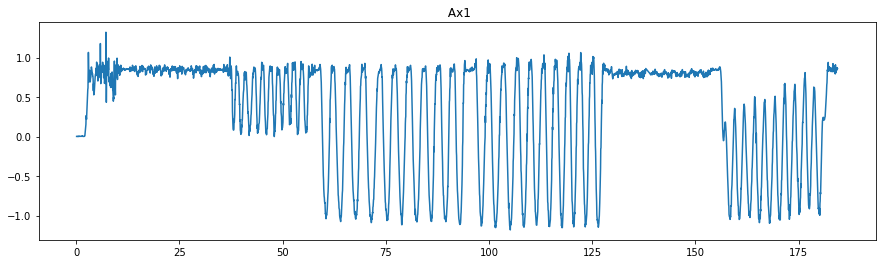

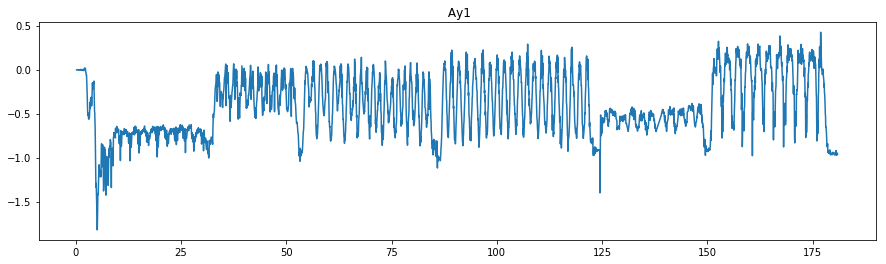

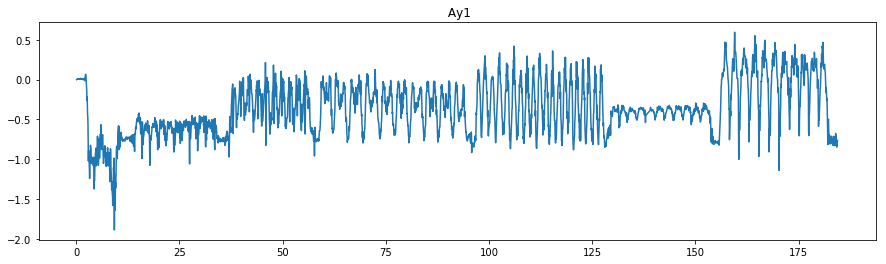

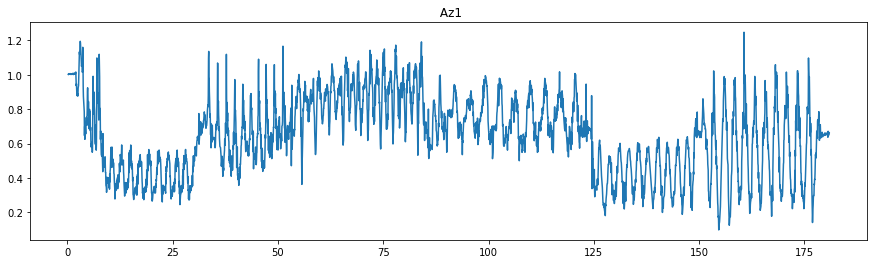

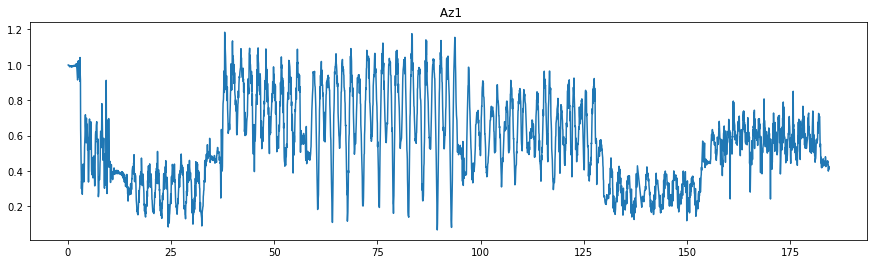

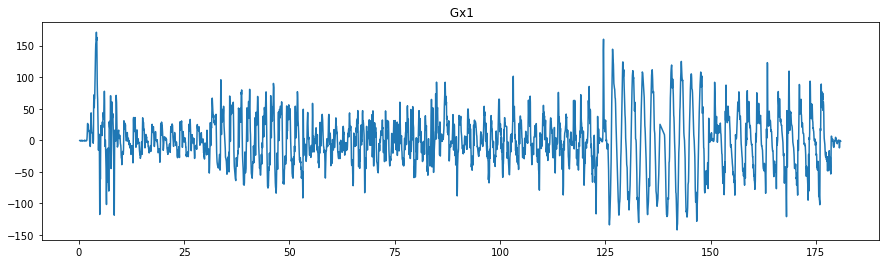

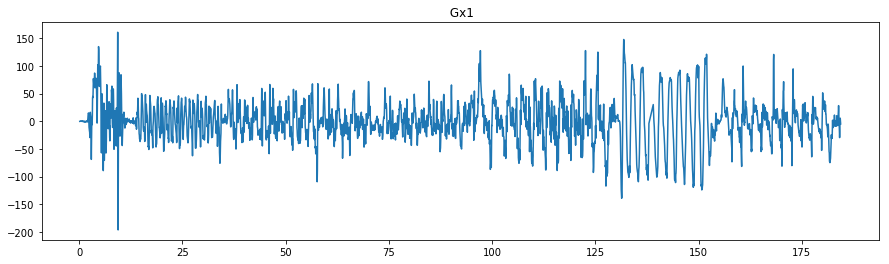

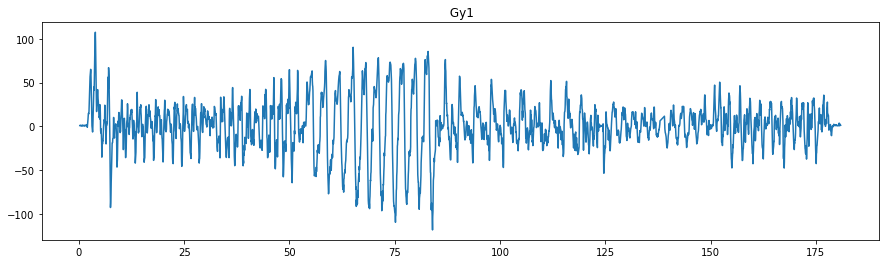

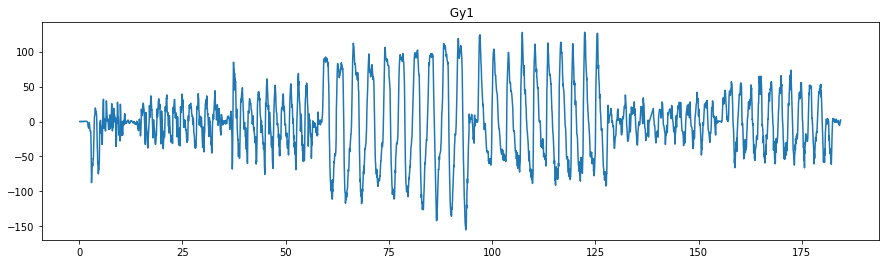

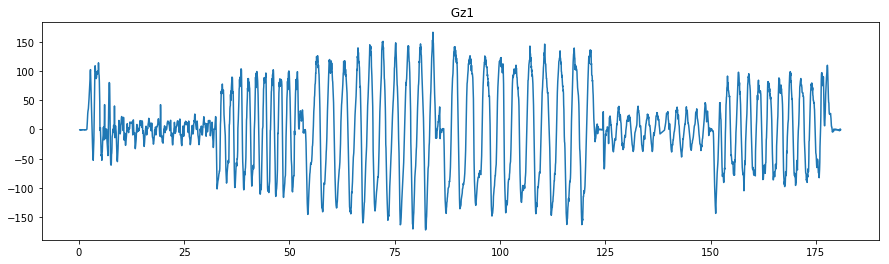

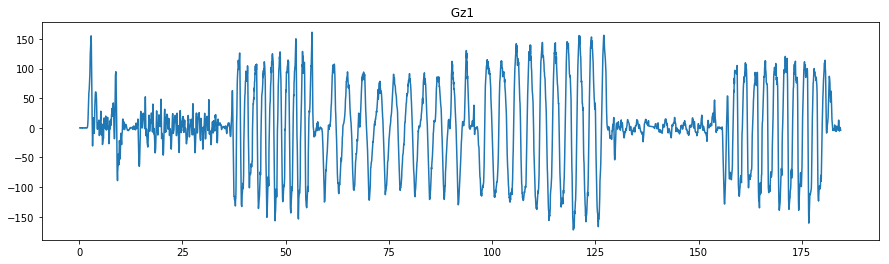

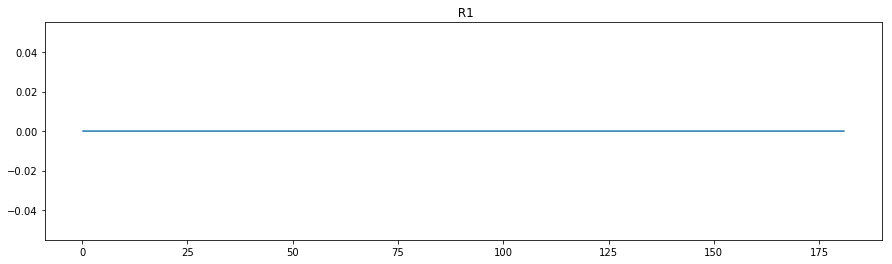

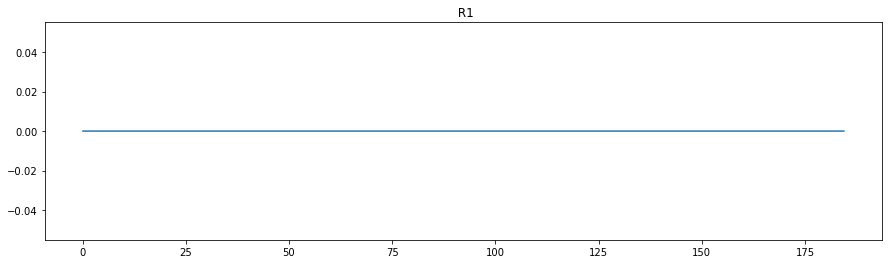

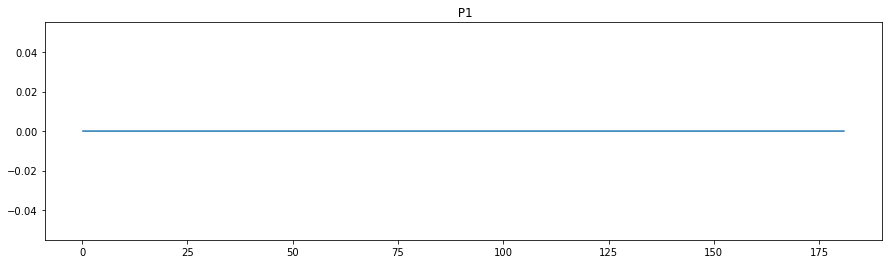

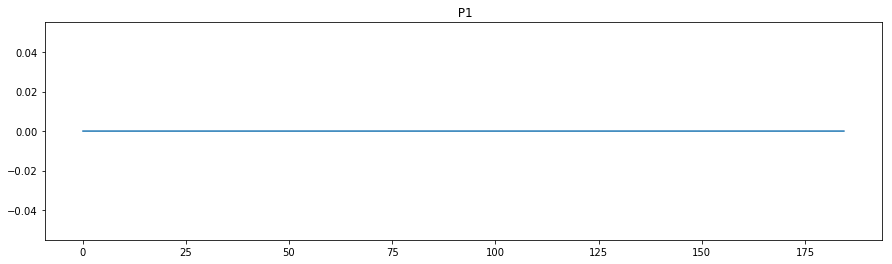

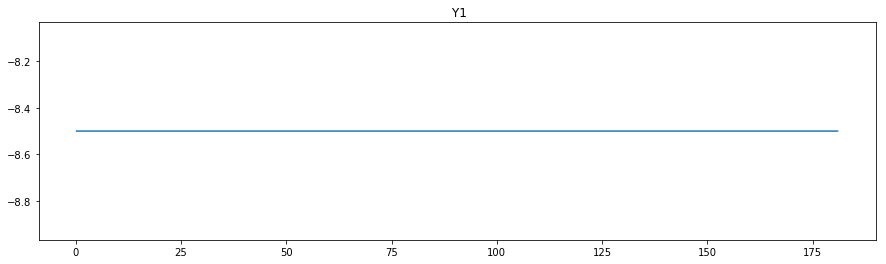

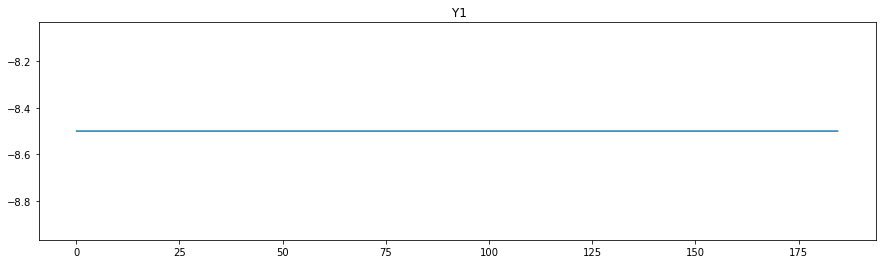

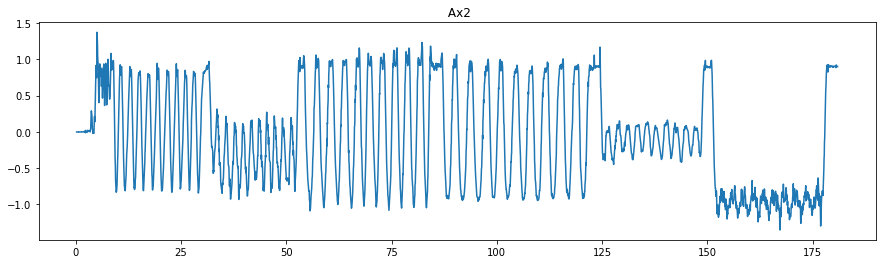

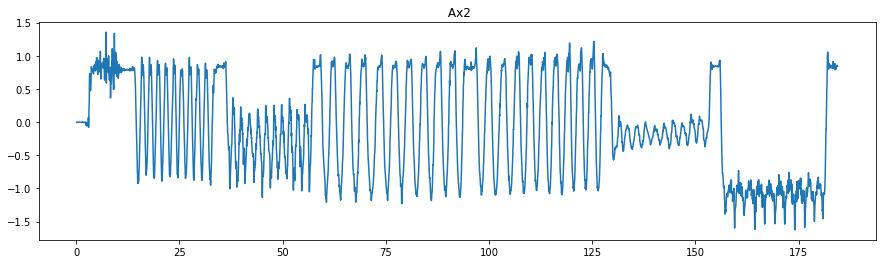

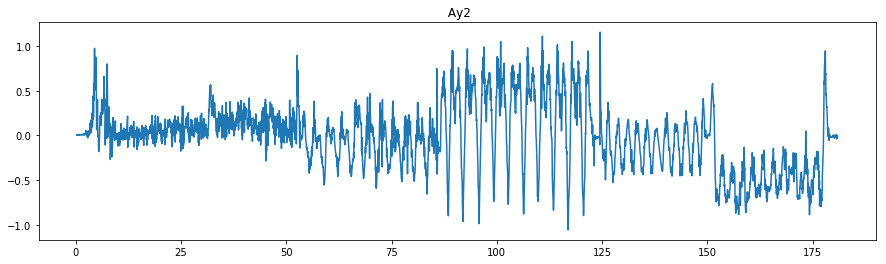

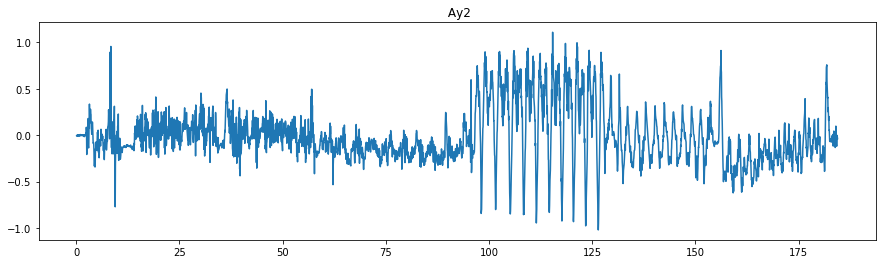

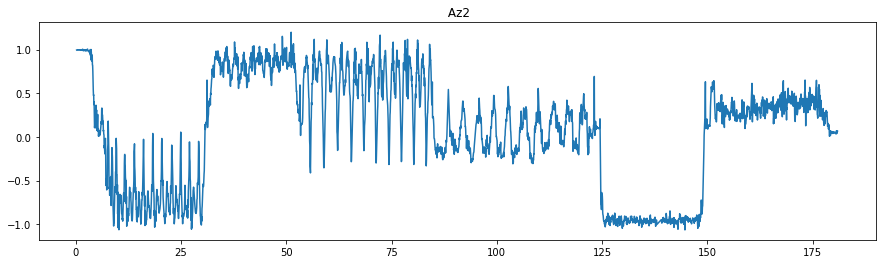

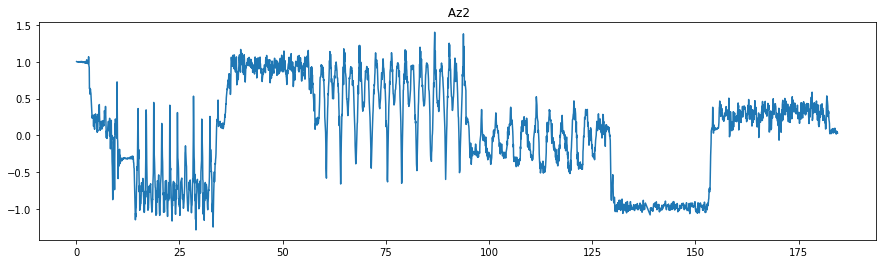

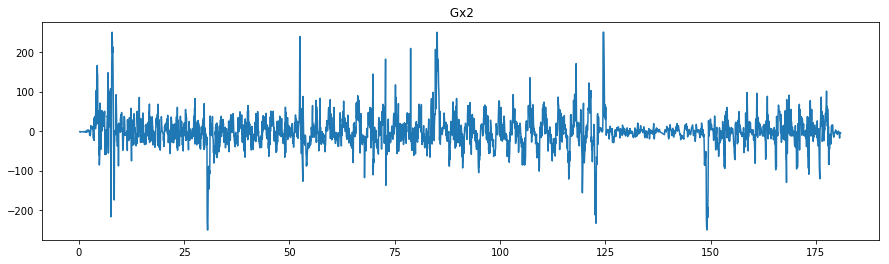

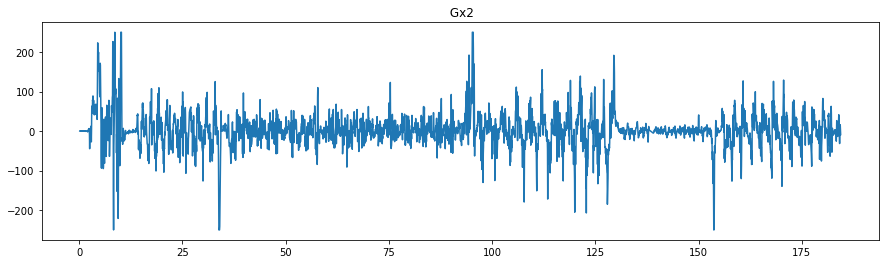

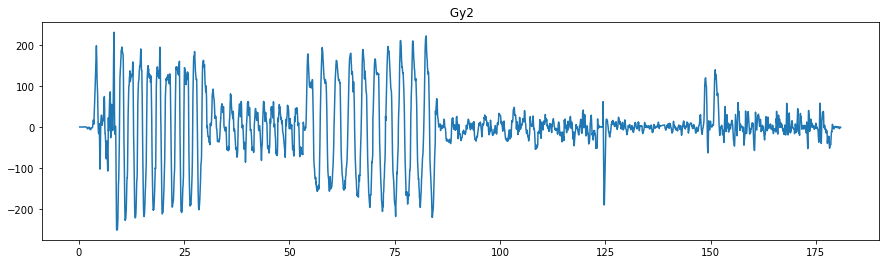

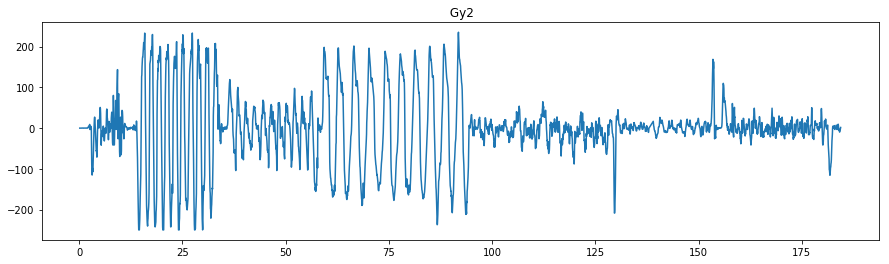

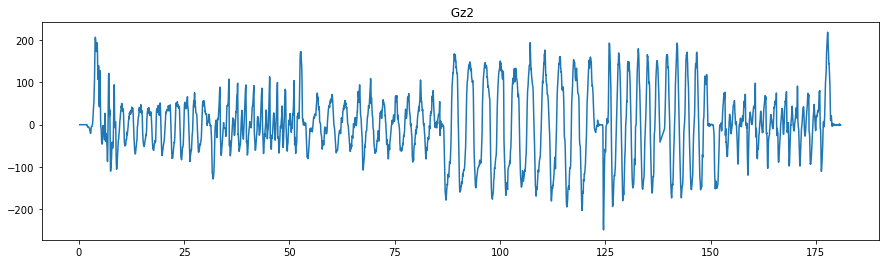

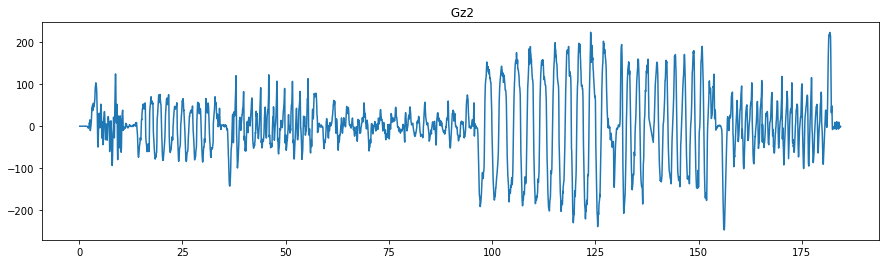

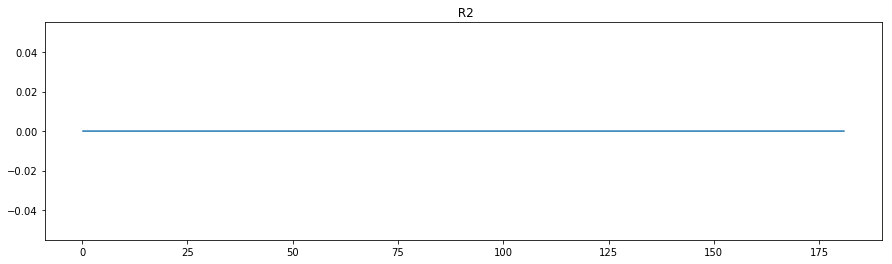

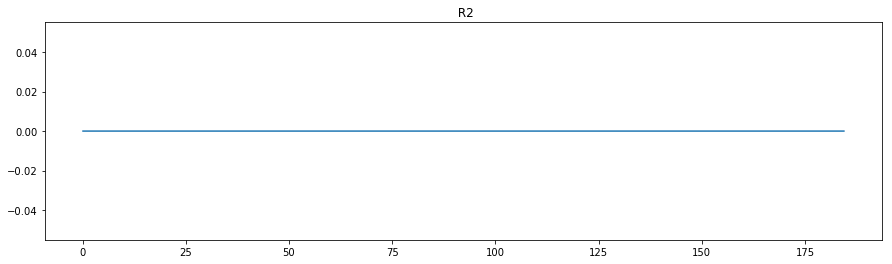

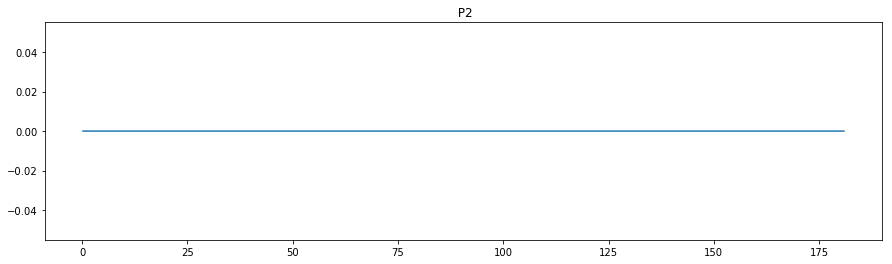

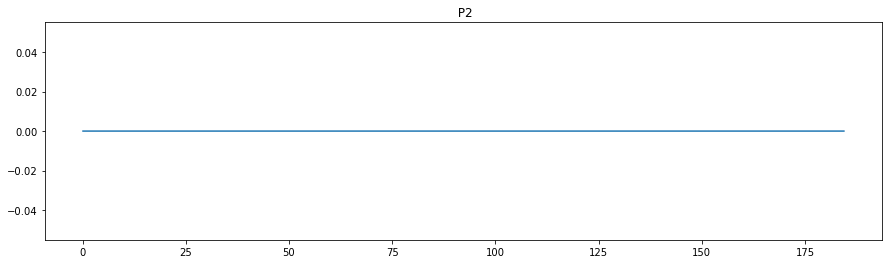

In [46]:
data2=pd.read_csv('read_data2.csv')

data=data[2:]
data2=data2[2:]
for i in range(1,18):
    plt.figure(figsize=(15, 4))
    plt.title(data.columns.values[i])
    plt.plot(data[data.columns.values[0]],data[data.columns.values[i]])
#    start, end = plt.get_xlim()
#    plt.xticks(np.arange(data['Time'][10],data['Time'][100],10))
    plt.figure(figsize=(15, 4))
    plt.title(data.columns.values[i])
    plt.plot(data2[data.columns.values[0]],data2[data.columns.values[i]])
    
plt.show()

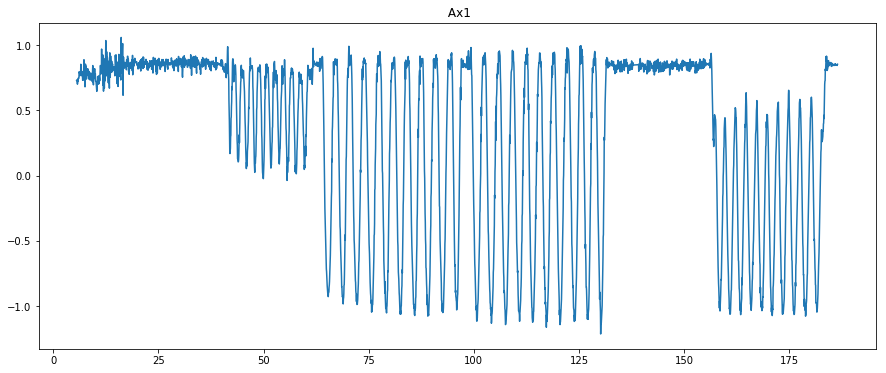

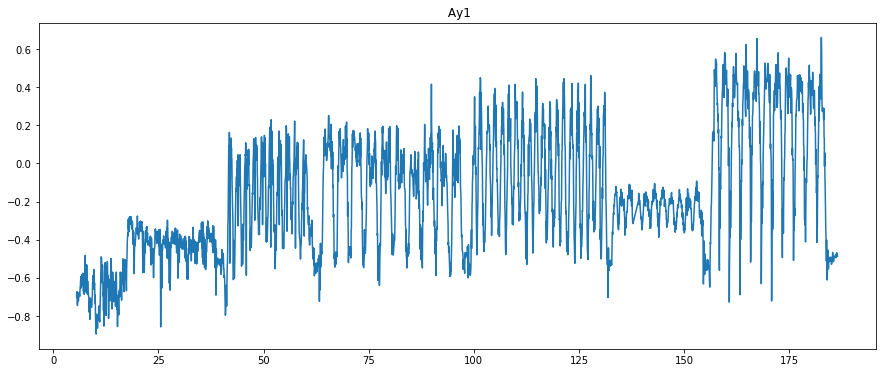

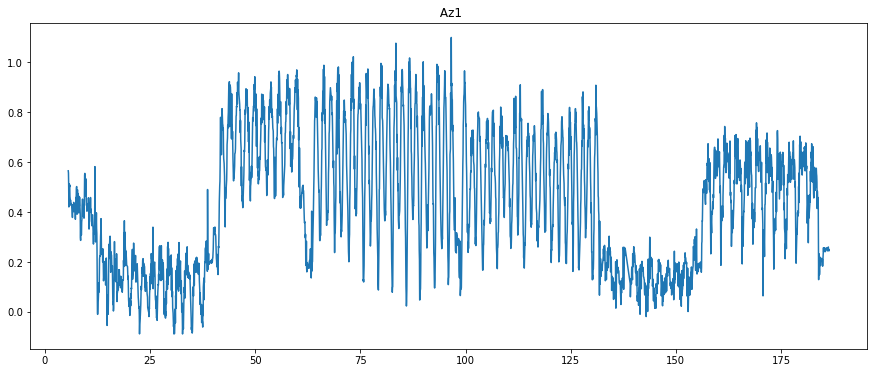

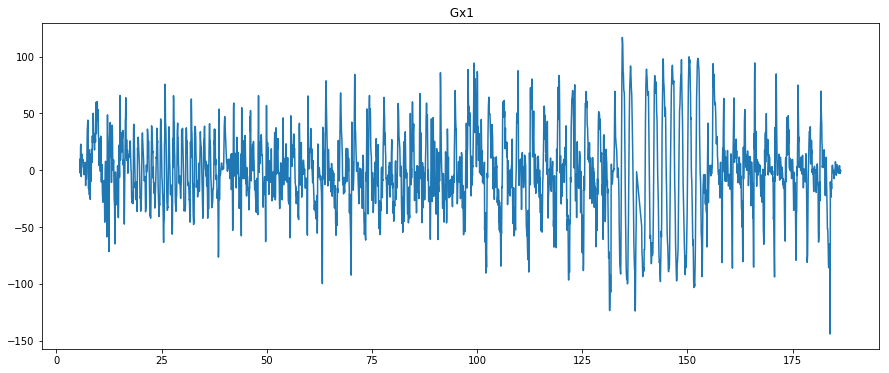

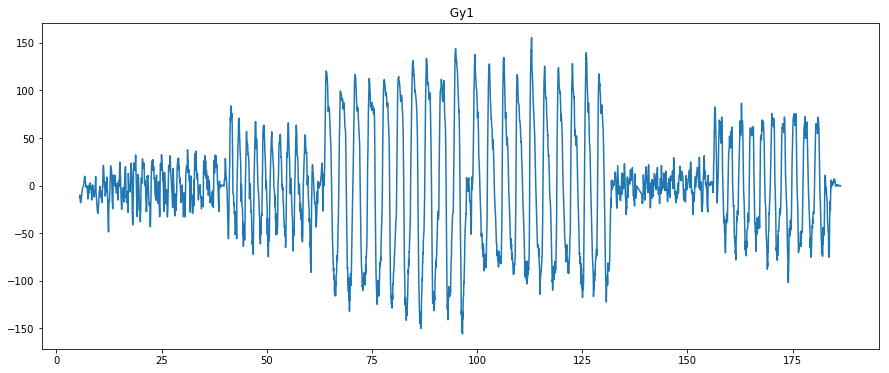

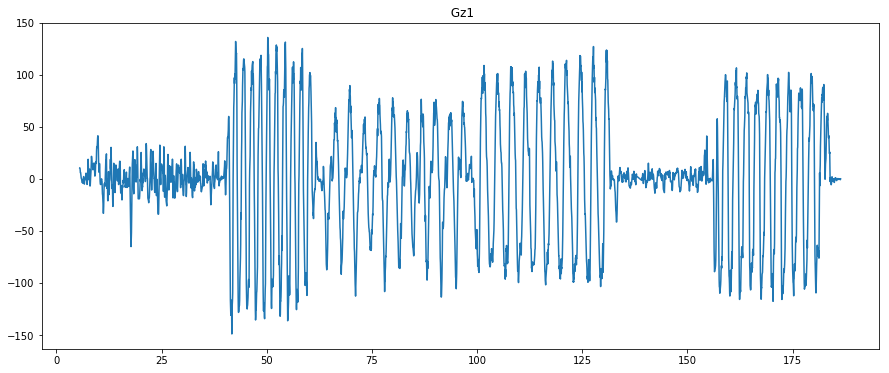

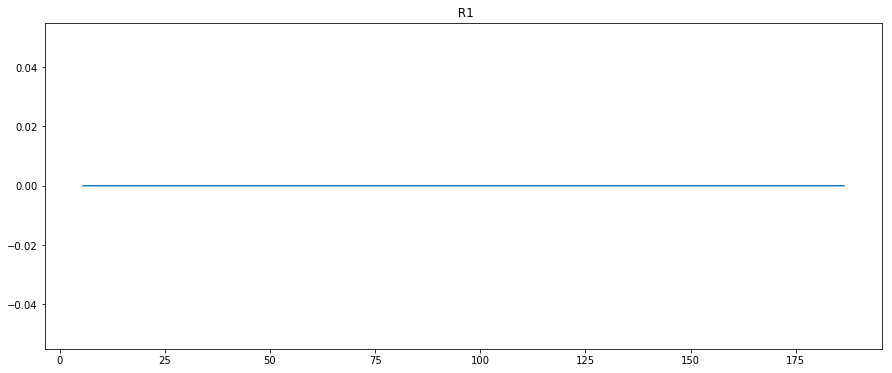

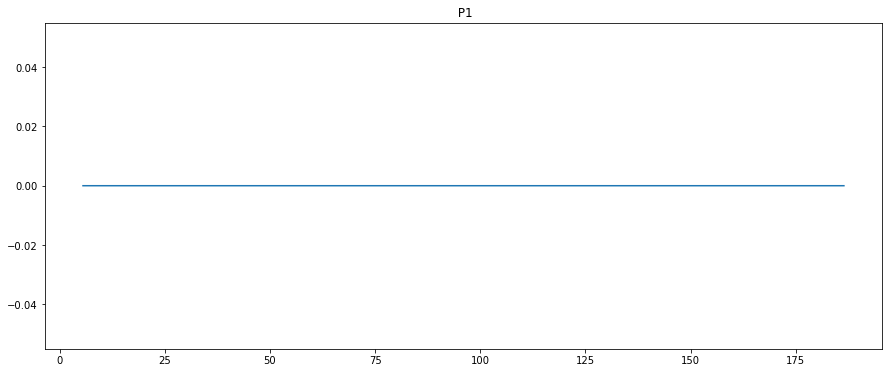

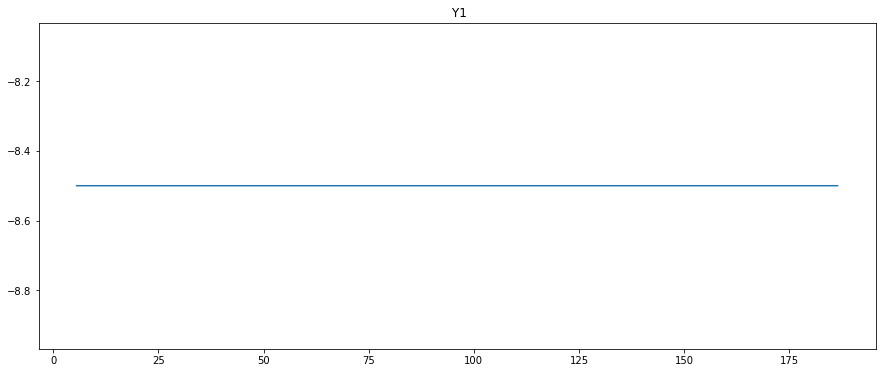

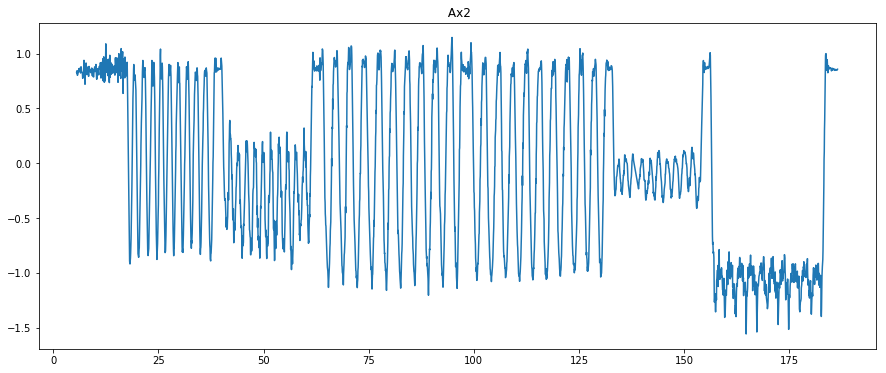

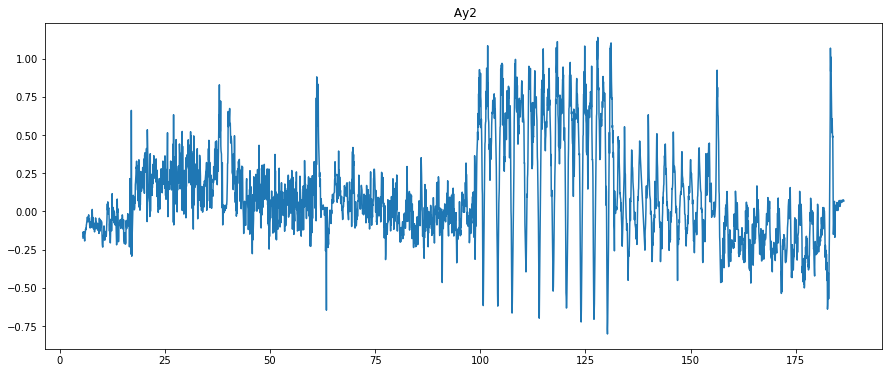

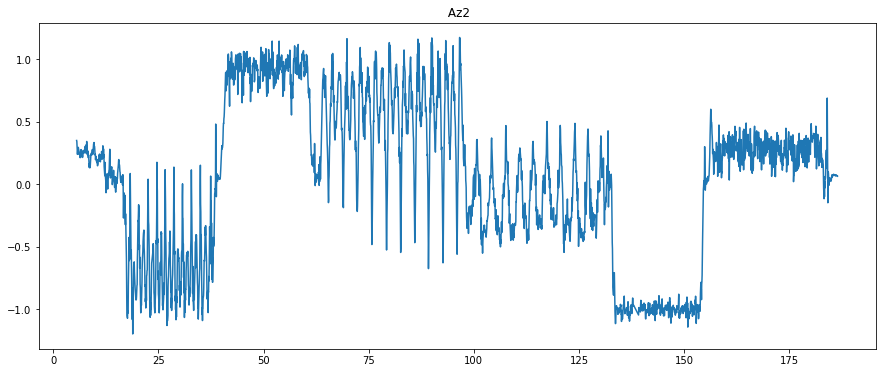

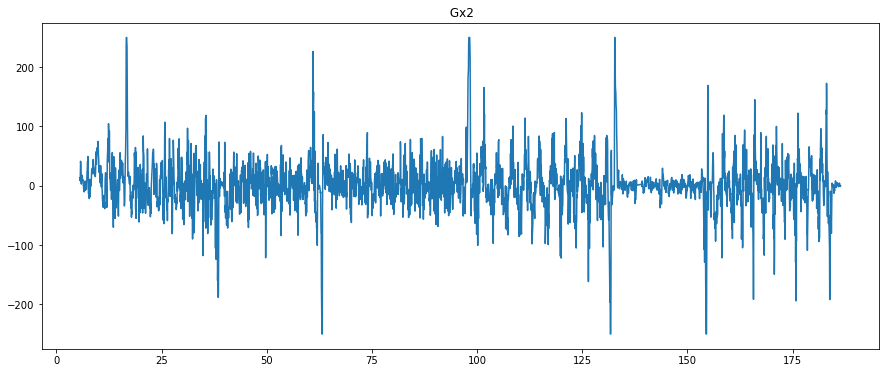

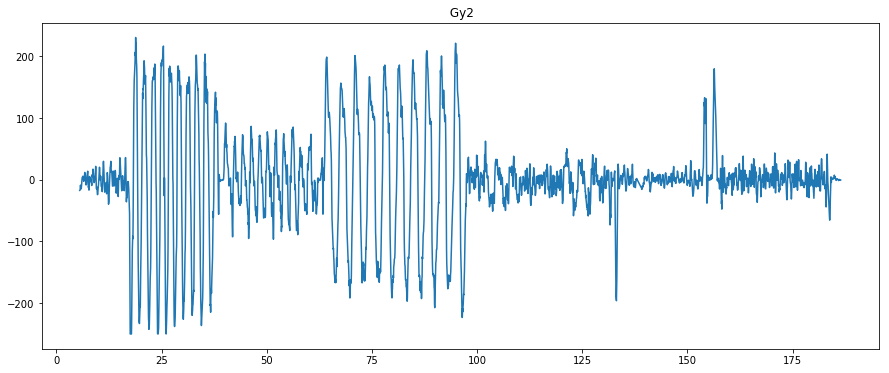

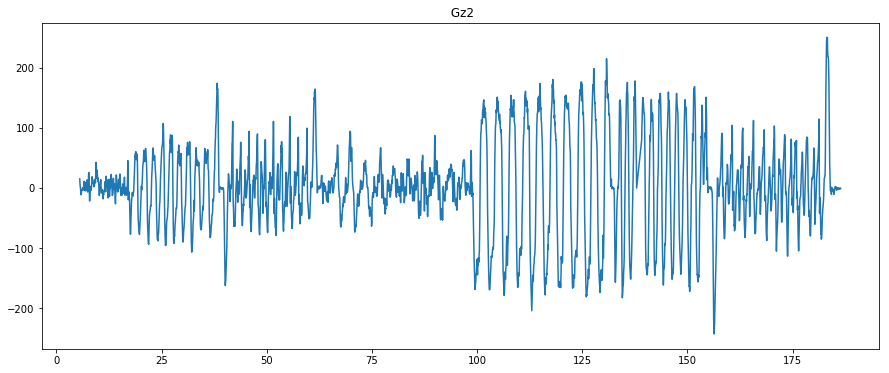

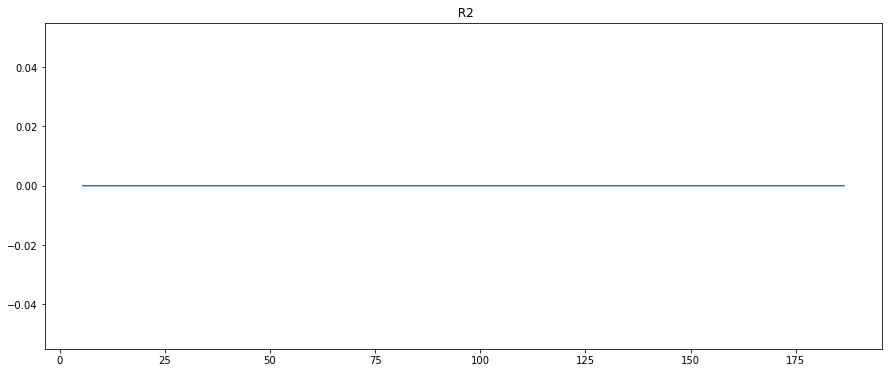

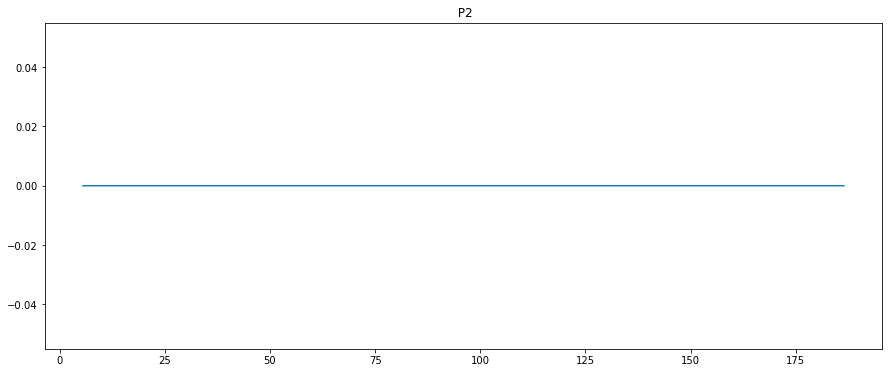

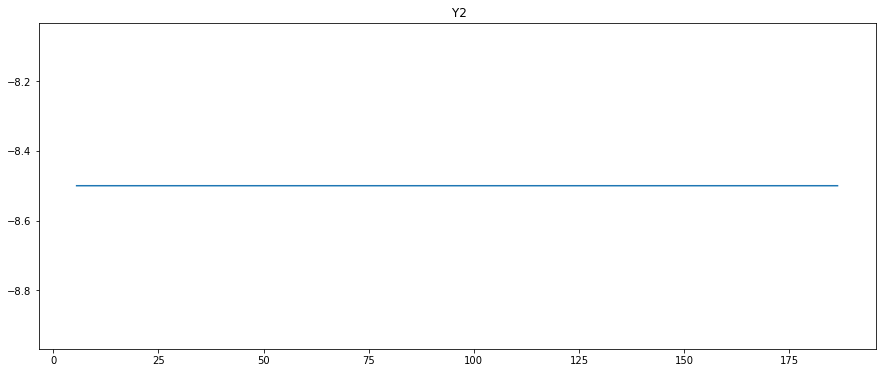

In [12]:
data=pd.read_csv('read_data1.csv')
data=data[100:]
for i in range(1,len(data.columns.values)):
    #plt.subplot(221+i)
    plt.figure(figsize=(15, 6))
    plt.title(data.columns.values[i])
    plt.plot(data[data.columns.values[0]],data[data.columns.values[i]])
    
plt.show()

In [33]:
#s=get_fft(data[' P2'])

#s2=s[(s['frequency (Hz)']>0.2) &(s['frequency (Hz)']<5) ]
#s2.plot(x='frequency (Hz)',figsize=(10,5))
#plt.show()

In [40]:
print(data['Time'][10],data['Time'][480])

1.26300001144 31.1100006104


In [89]:
l=len(data.columns.values)
for i in range(l):
    print(i,data.columns.values[i])

0 Time
1  Ax1
2  Ay1
3  Az1
4  Gx1
5  Gy1
6  Gz1
7  R1
8  P1
9  Y1
10  Ax2
11  Ay2
12  Az2
13  Gx2
14  Gy2
15  Gz2
16  R2
17  P2
18  Y2


In [17]:
data=pd.read_csv('data1213.csv')
data.head()

Time       Ax1       Ay1       Az1        Gx1       Gy1       Gz1  \
0  0.113 -0.100647  0.004333  0.963867  11.123657  3.860474 -3.990173   
1  0.162 -0.099304  0.012268  0.963867  11.802673  4.165649 -3.837585   
2  0.211 -0.099365  0.013184  0.963074  11.352539  4.066467 -3.936768   
3  0.261 -0.104309  0.012085  0.963440  11.146545  4.020691 -3.837585   
4  0.312 -0.099426  0.012207  0.961609  11.253357  3.883362 -3.890991   

           R1         P1          Y1       Ax2       Ay2       Az2       Gx2  \
0   88.346291  23.984913 -188.480667 -0.141663  0.067688 -1.115479  1.144409   
1  -88.813812   2.672763  156.784637 -0.143982  0.070374 -1.117615  0.984192   
2  107.037491 -13.199181  142.282150 -0.145569  0.070435 -1.120361  0.968933   
3  134.813080  -6.654678  124.403625 -0.145203  0.074402 -1.115723  0.648499   
4  137.342285  -3.089837  108.909531 -0.144104  0.068359 -1.123169  0.816345   

         Gy2       Gz2          R2         P2         Y2  
0 -14.549255 -4.051208   88.685562  -0.279142  15.503309  
1 -14.335632 -4.005432  130.051163   9.915664  20.941746  
2 -14.472961 -3.807068  100.732216  15.526544  12.957445  
3 -14.770508 -4.112244   93.714607  23.573544  25.836517  
4 -14.770508 -3.982544   90.505295  28.397186  55.922424

Lifting 50 times.csv


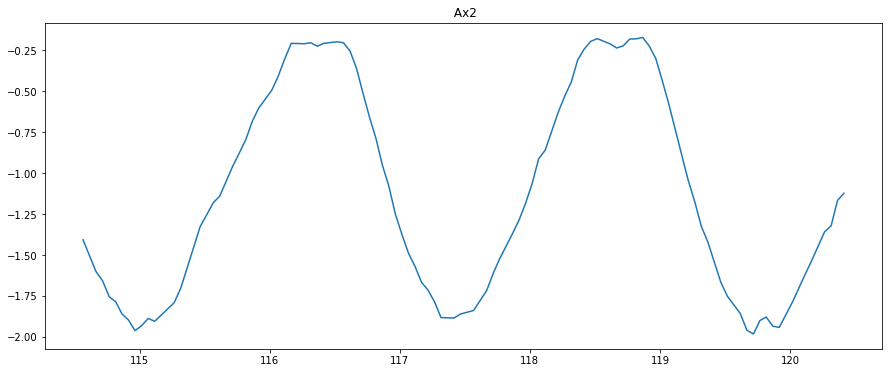

Punching 50 times.csv


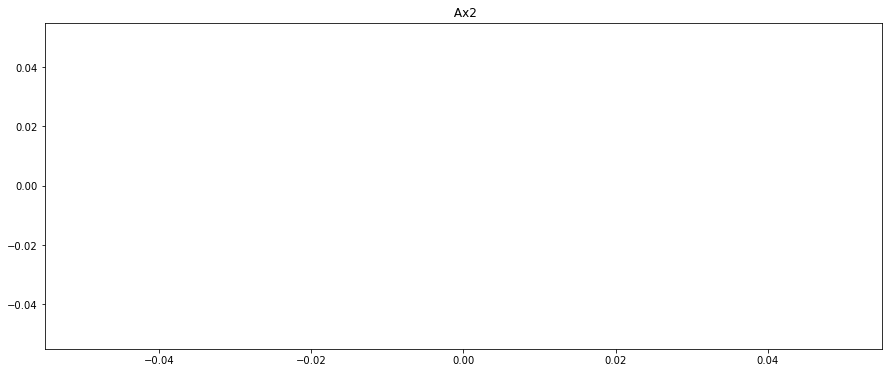

rise front 50 times.csv


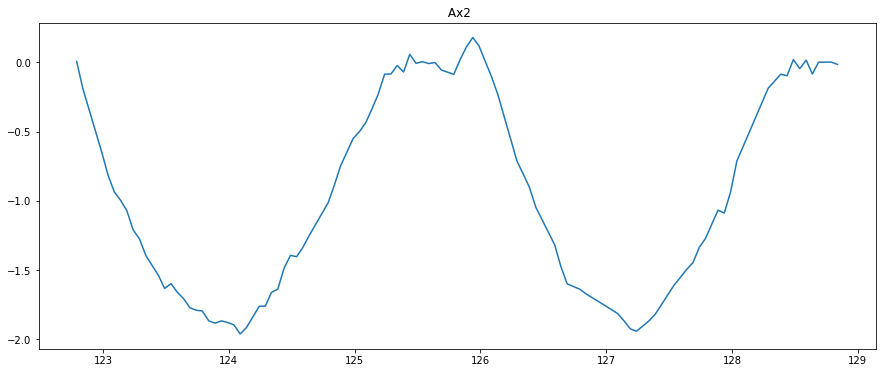

rise side 50 times.csv


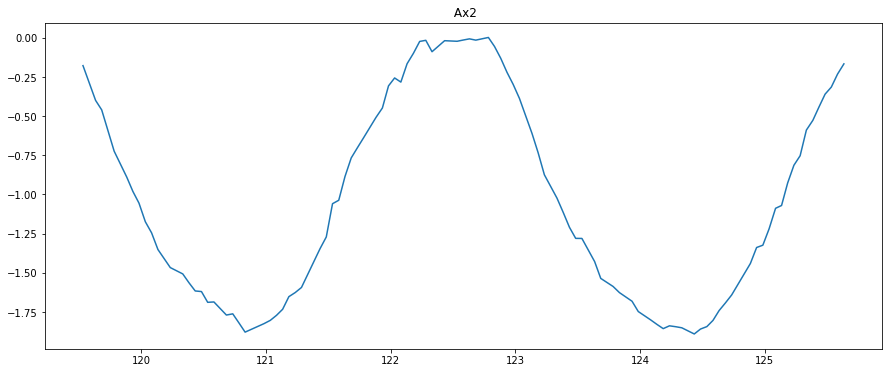

shaking 50 times.csv


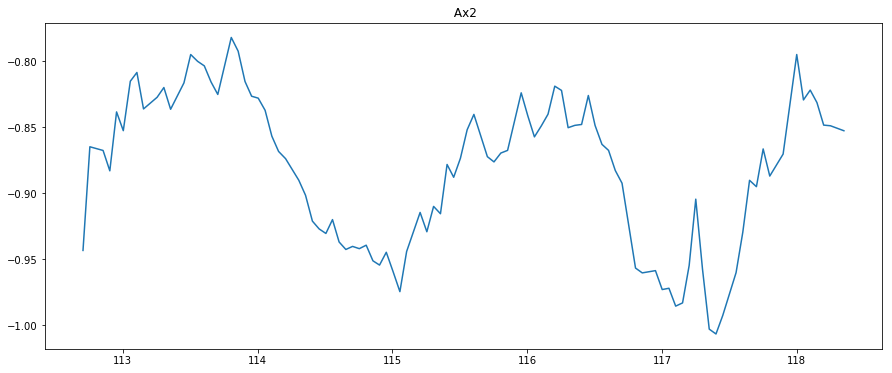

shoulder pressing 50 times.csv


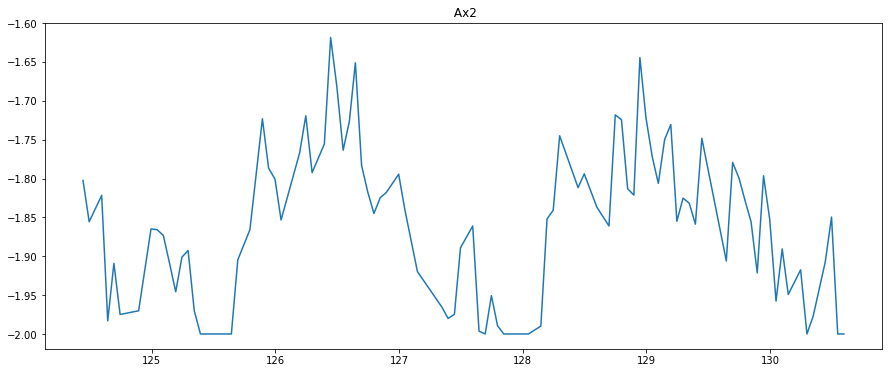

In [108]:
book=['Lifting 50 times.csv','Punching 50 times.csv','rise front 50 times.csv','rise side 50 times.csv','shaking 50 times.csv','shoulder pressing 50 times.csv']
for i in book:
    data=pd.read_csv(i)
    data=data[1962:2062]
    print(i)
    plt.figure(figsize=(15, 6))
    plt.title(data.columns.values[10])
    plt.plot(data[data.columns.values[0]],data[data.columns.values[10]])
    plt.show()

/Users/Dayou/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


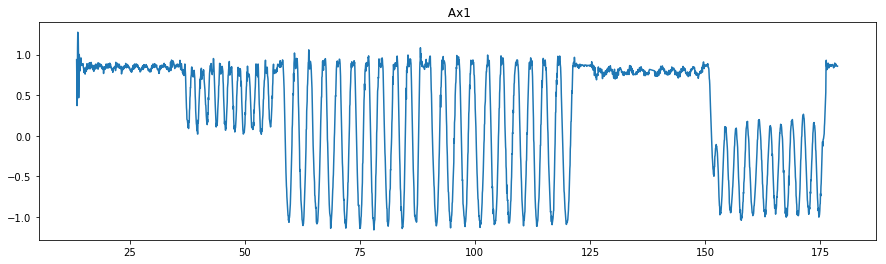

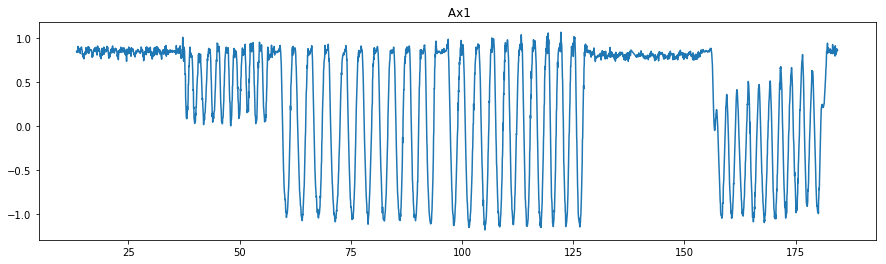

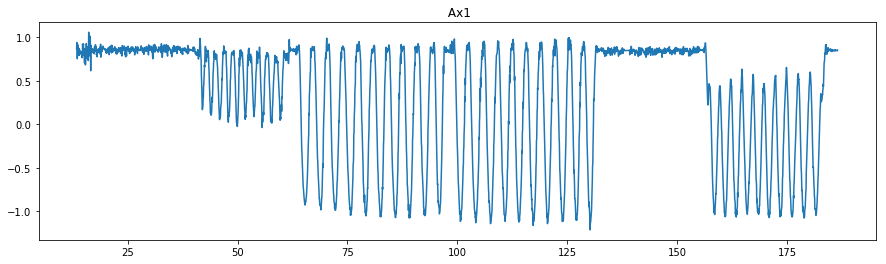

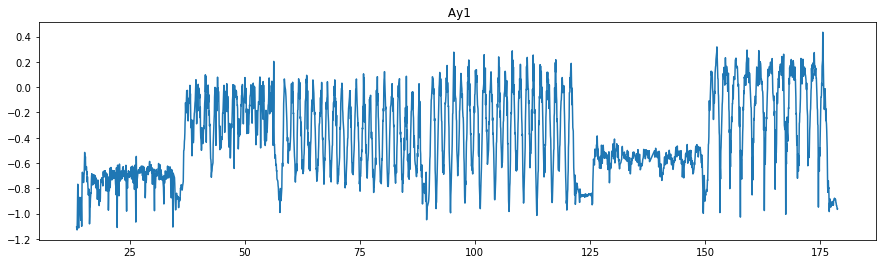

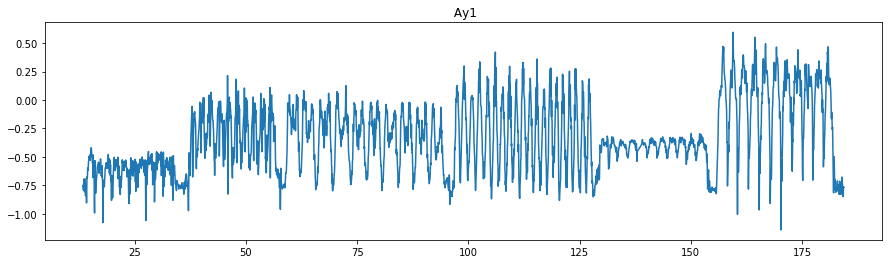

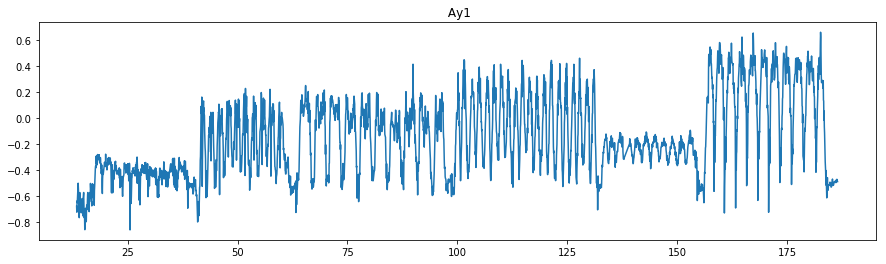

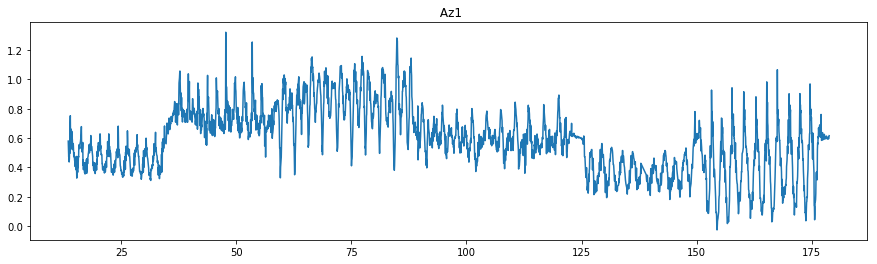

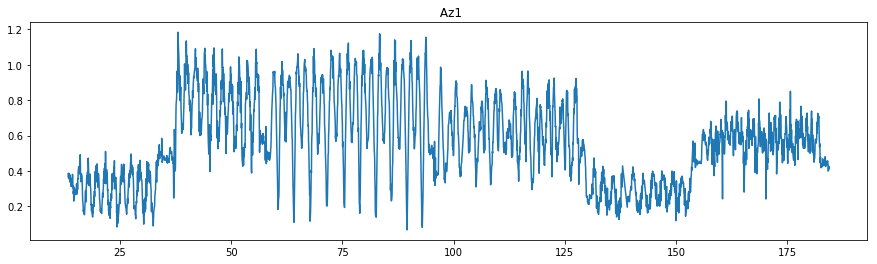

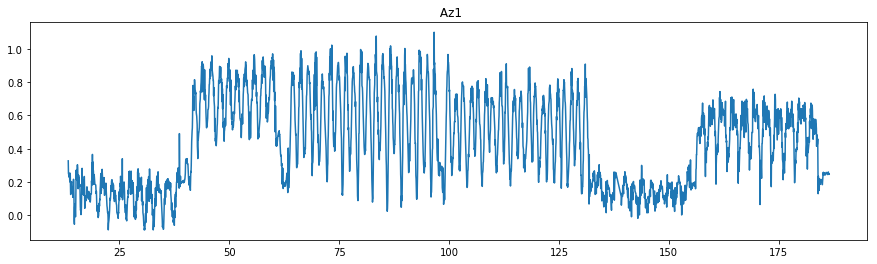

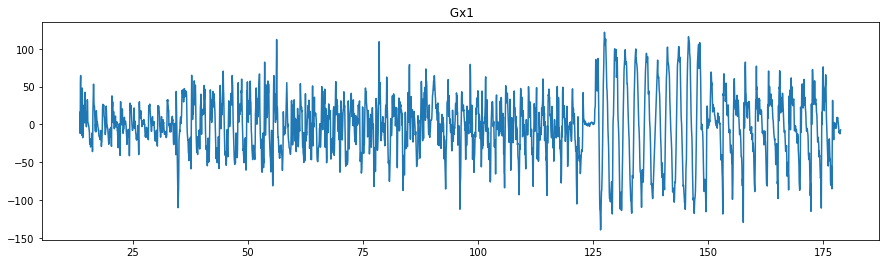

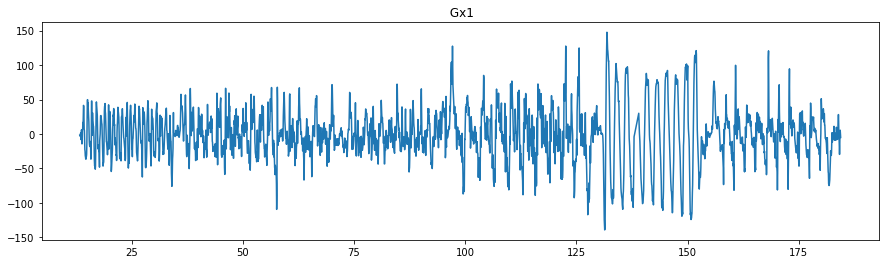

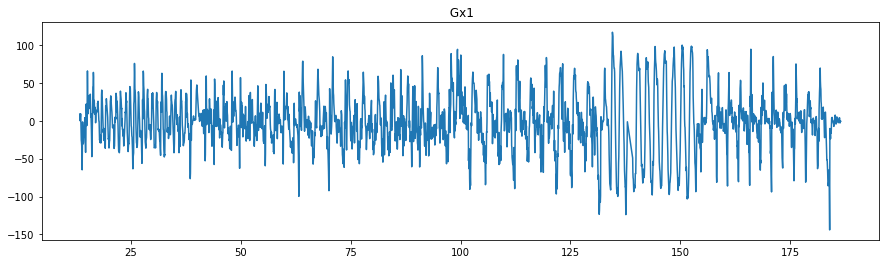

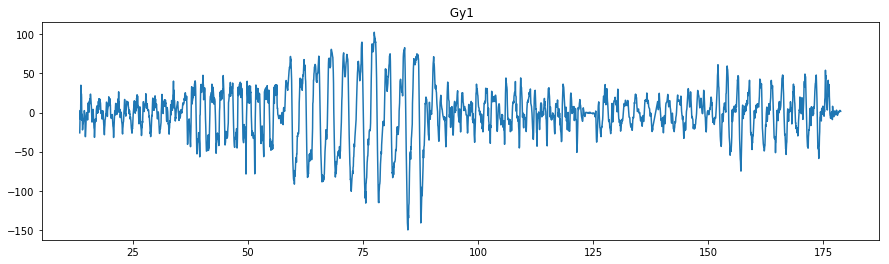

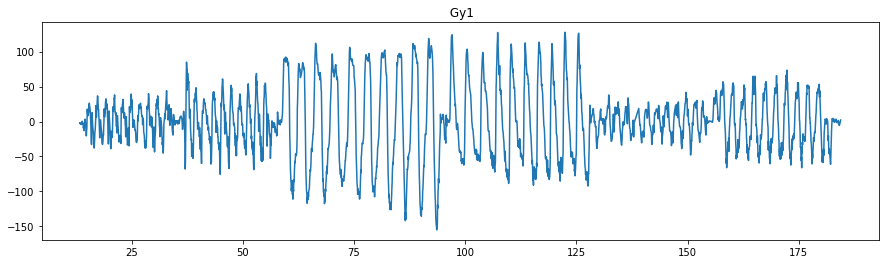

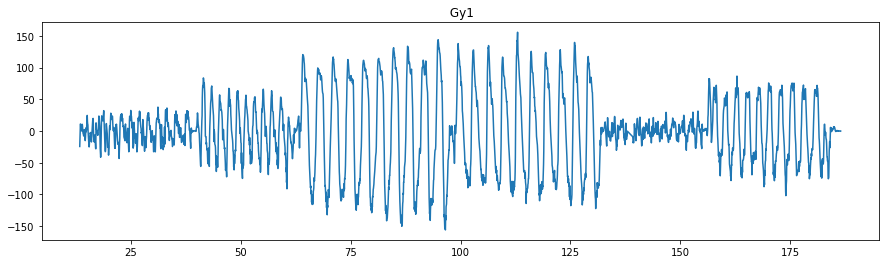

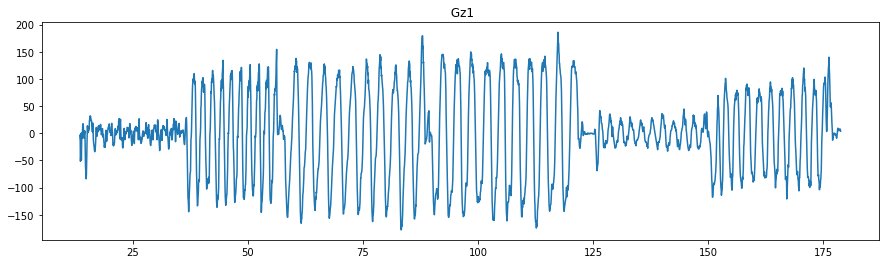

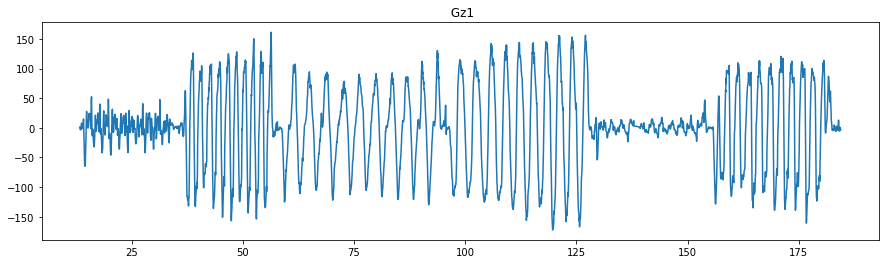

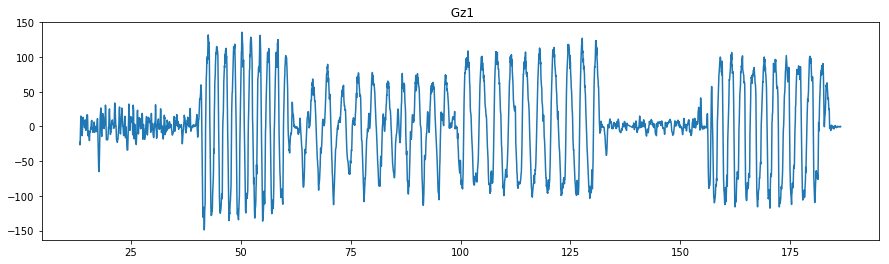

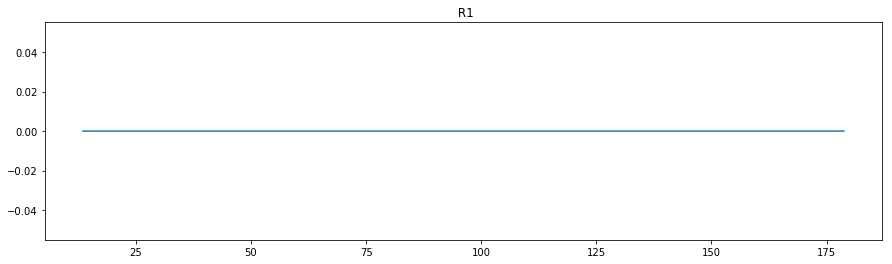

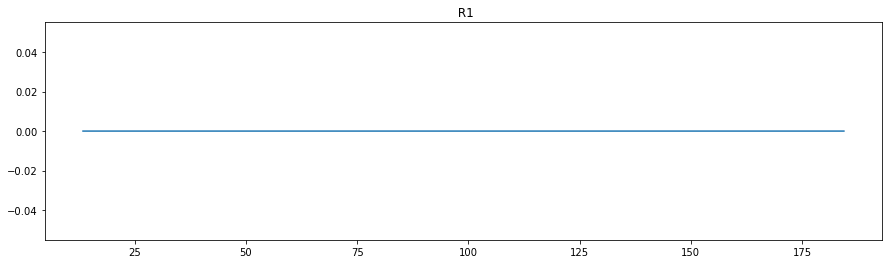

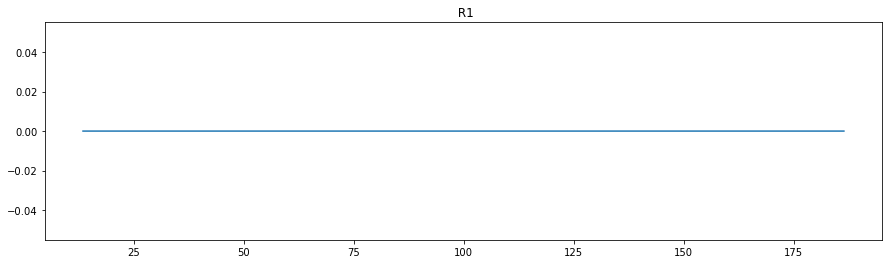

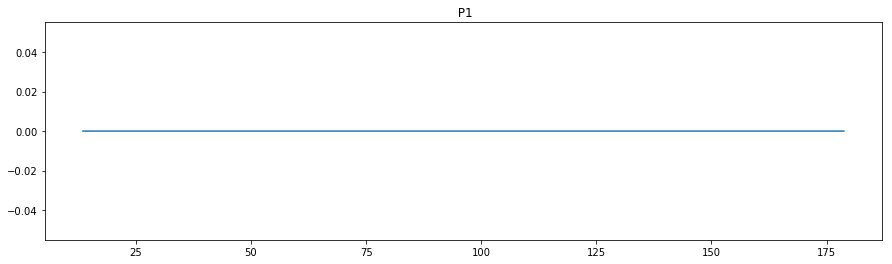

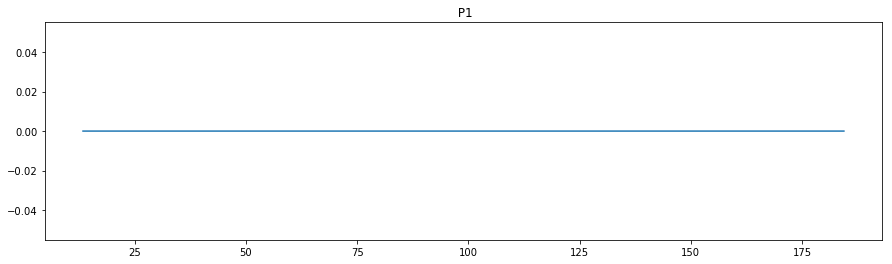

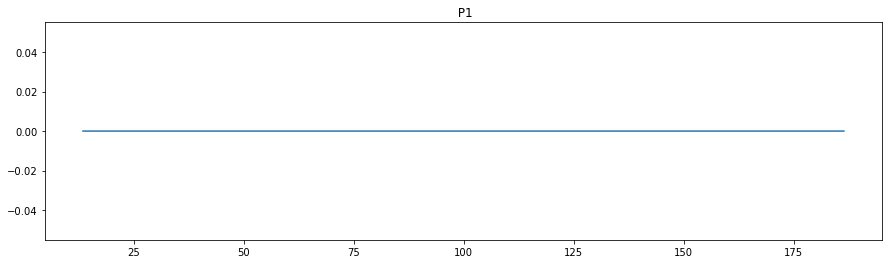

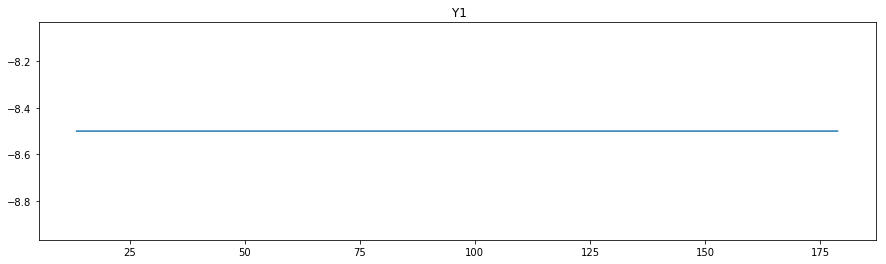

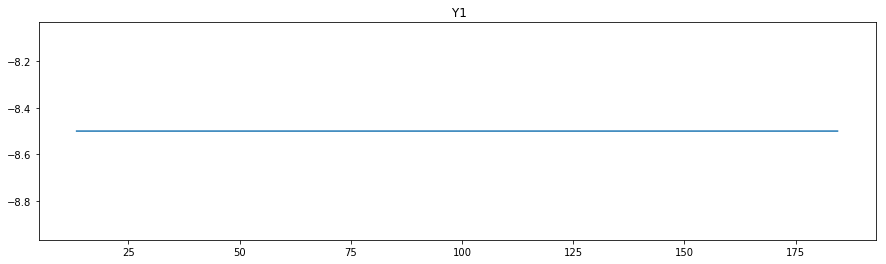

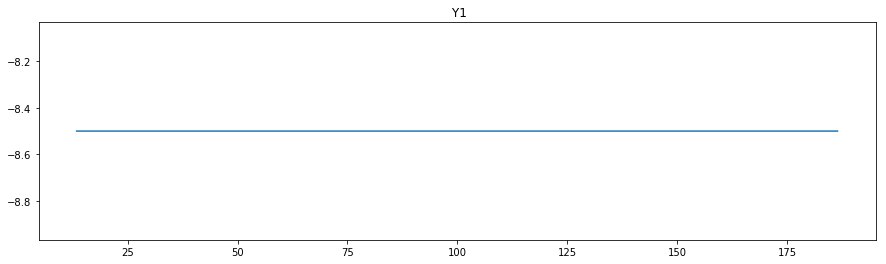

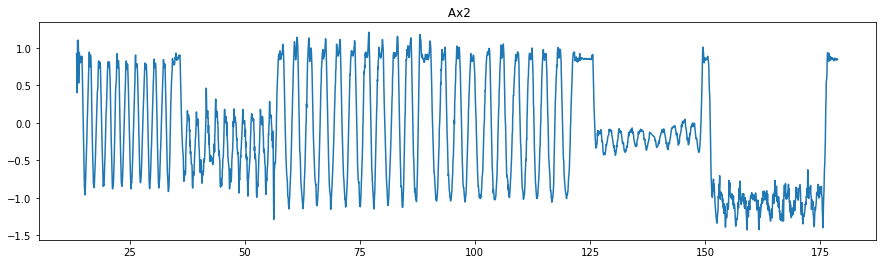

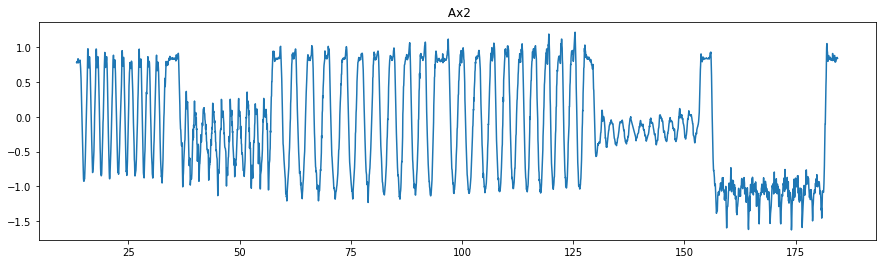

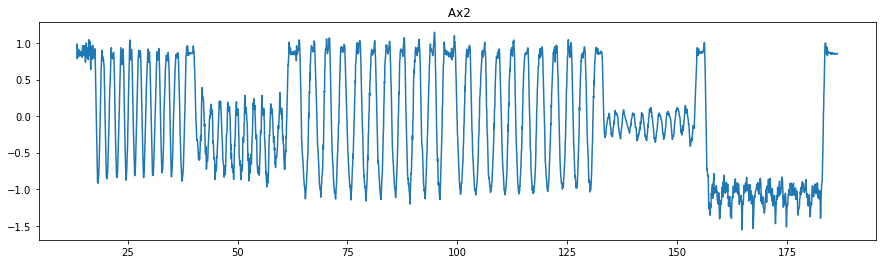

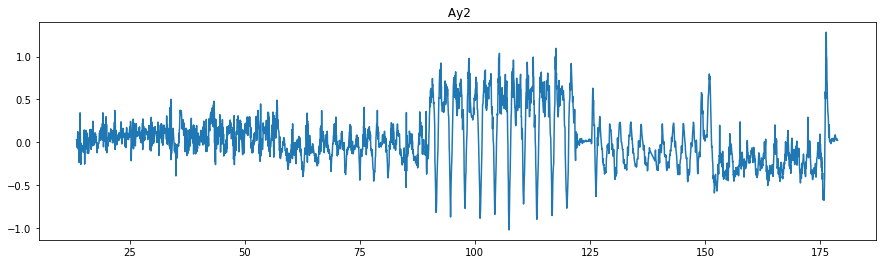

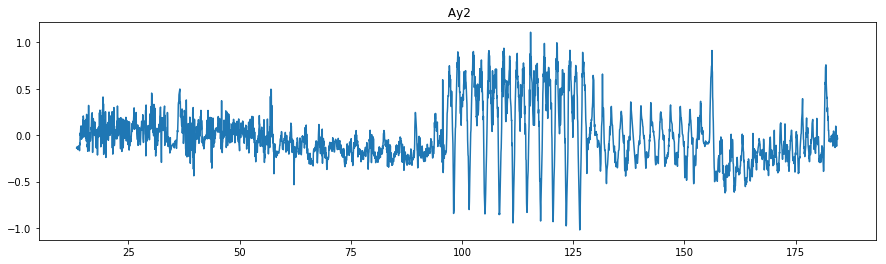

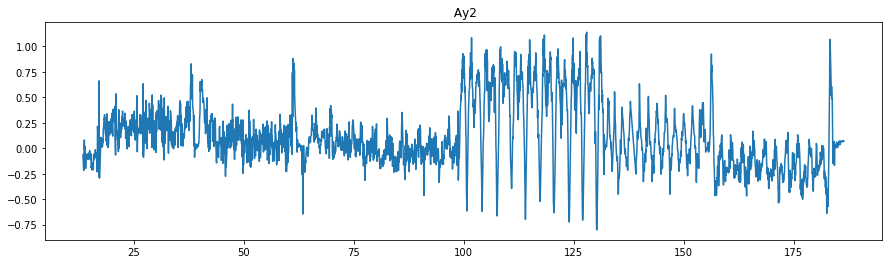

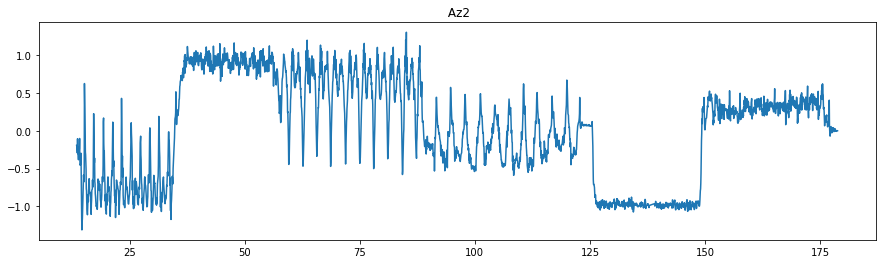

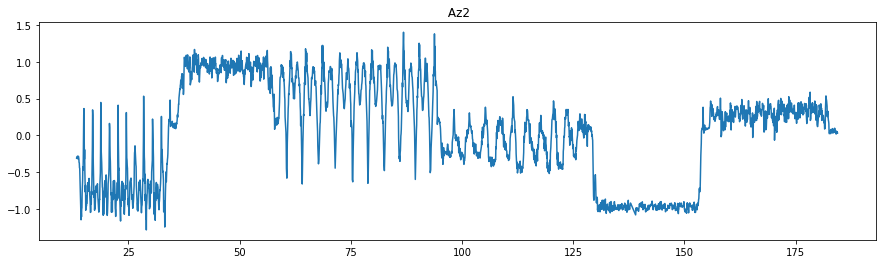

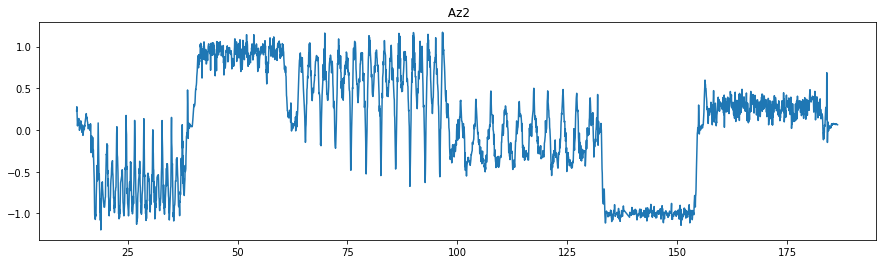

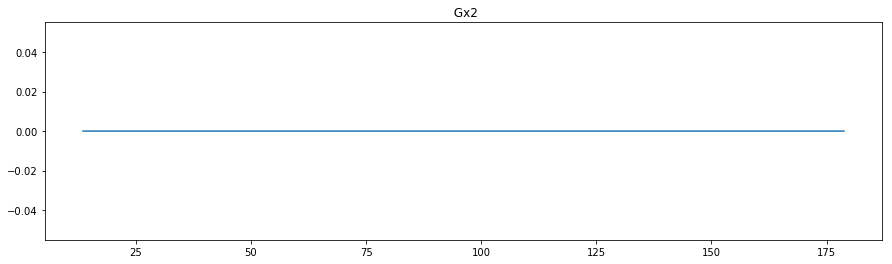

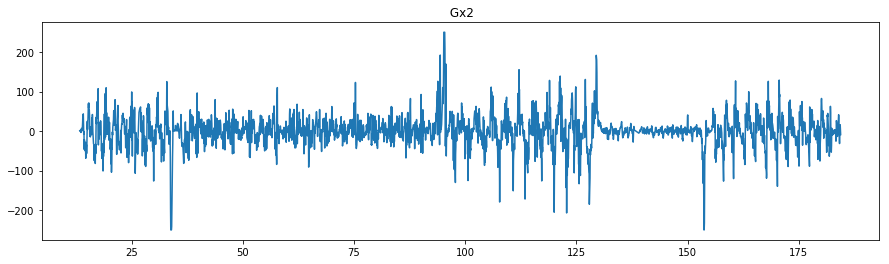

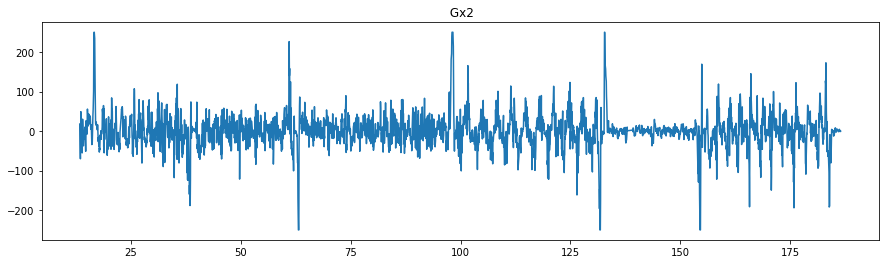

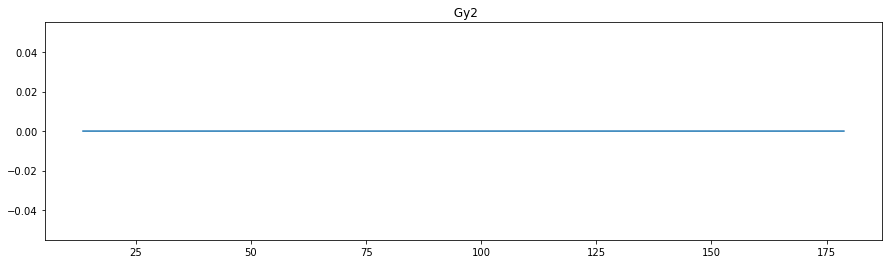

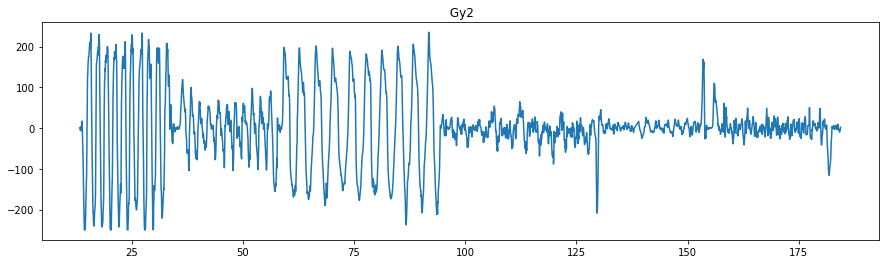

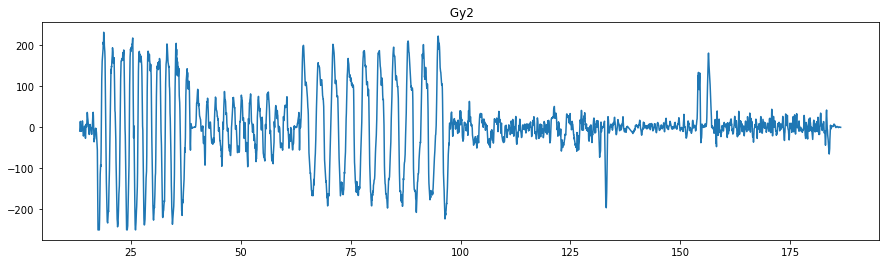

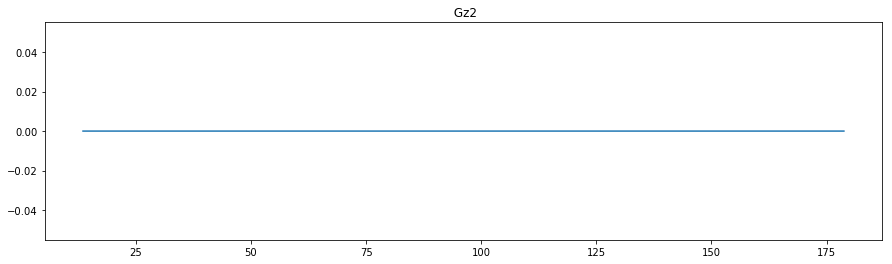

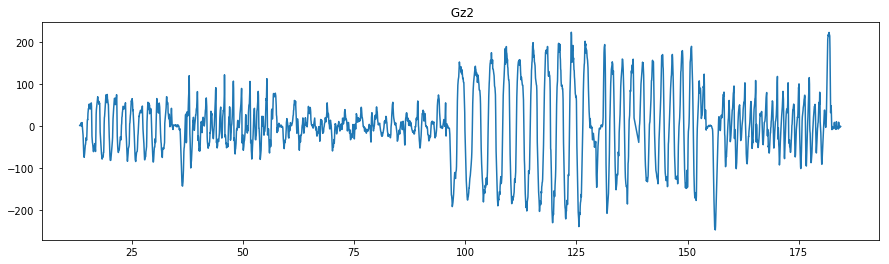

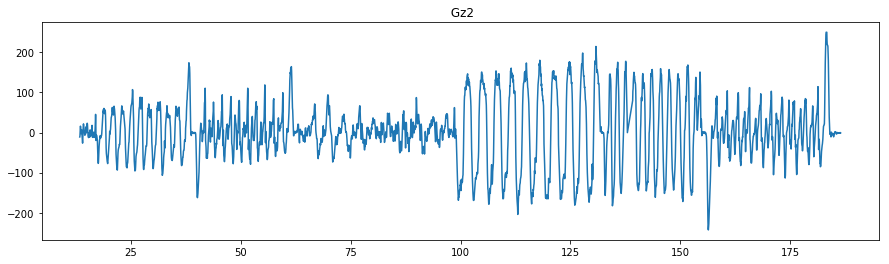

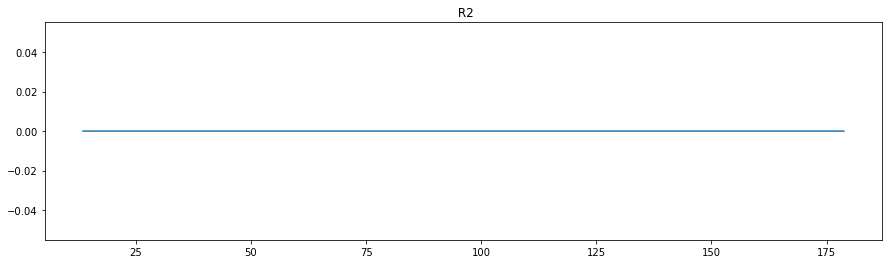

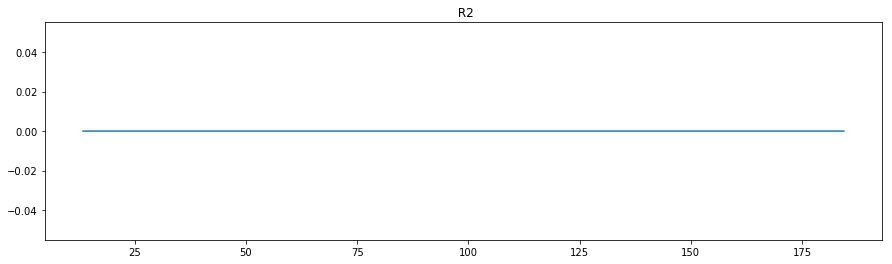

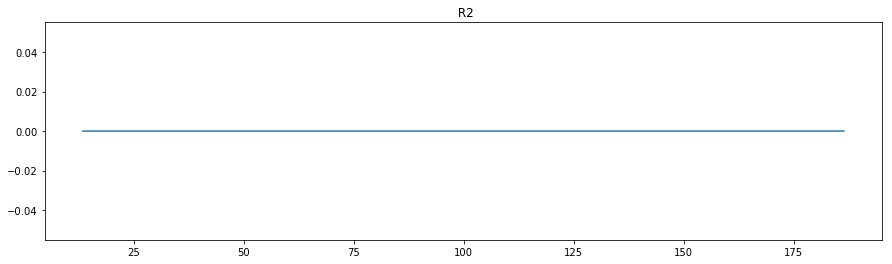

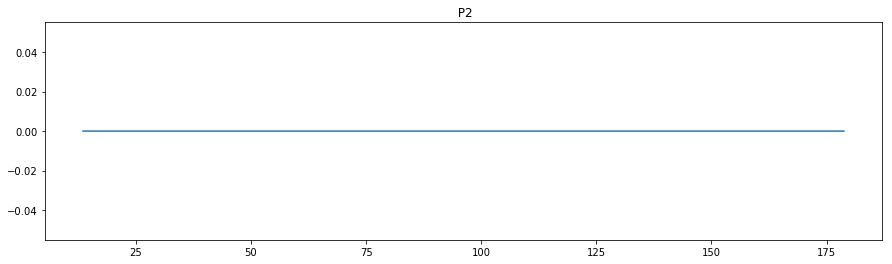

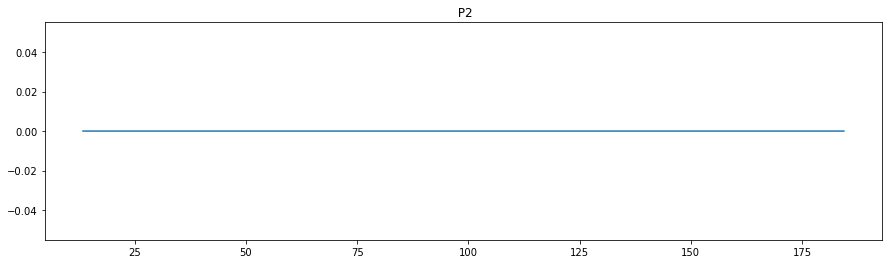

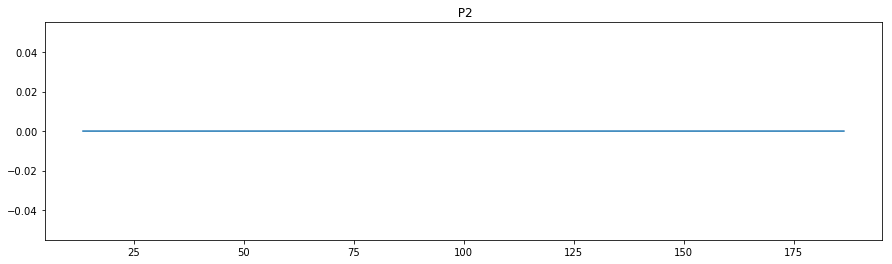

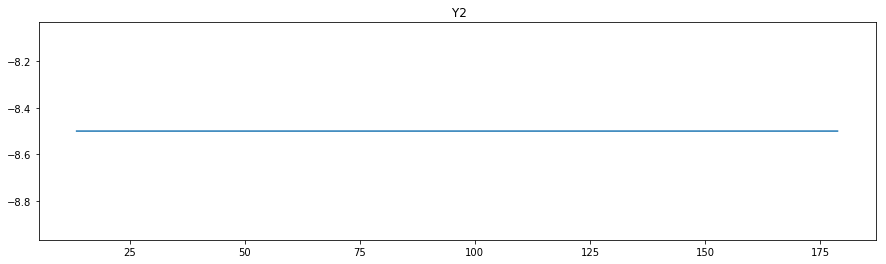

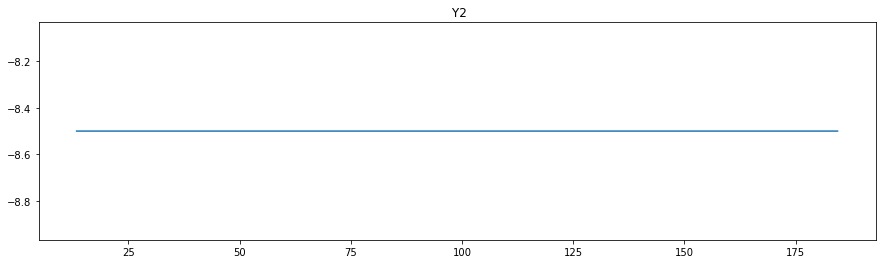

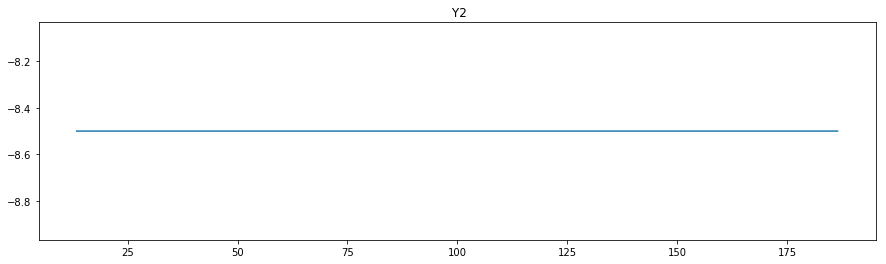

In [17]:
#data0=pd.read_csv('data_5pm.csv')
data1=pd.read_csv('read_data3.csv')
data2=pd.read_csv('read_data2.csv')
data3=pd.read_csv('read_data1.csv')
#data0=data0[10:480]
data1=data1[250:]
data2=data2[250:]
data3=data3[250:]
for i in range(1,len(data.columns.values)):
 #   plt.figure(figsize=(15, 6))
  #  plt.title(data.columns.values[i])
   # plt.plot(data0[data.columns.values[0]],data0[data.columns.values[i]])
    
    plt.figure(figsize=(15, 4))
    plt.title(data.columns.values[i])
    plt.plot(data1[data.columns.values[0]],data1[data.columns.values[i]])
    
    plt.figure(figsize=(15, 4))
    plt.title(data.columns.values[i])
    plt.plot(data2[data.columns.values[0]],data2[data.columns.values[i]])

    plt.figure(figsize=(15, 4))
    plt.title(data.columns.values[i])
    plt.plot(data3[data.columns.values[0]],data3[data.columns.values[i]])
plt.show()

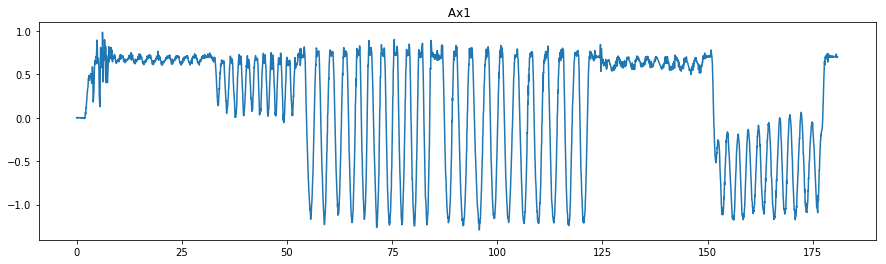

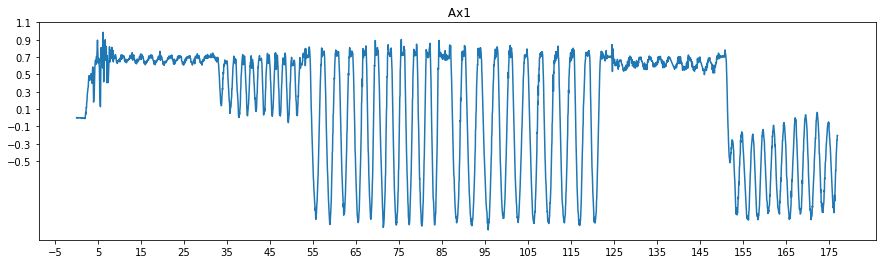

In [77]:
data1=pd.read_csv('read_data4.csv')
plt.figure(figsize=(15, 4))
plt.title(data.columns.values[1])
plt.plot(data1[data.columns.values[0]],data1[data.columns.values[1]])

data11=data1[0:3210]
plt.figure(figsize=(15, 4))
plt.title(data.columns.values[1])
plt.plot(data11[data.columns.values[0]],data11[data.columns.values[1]])
plt.xticks(np.arange(-5,180,10))
plt.yticks(np.arange(-0.5,1.3,0.2))

plt.show()

In [120]:
aa=pd.DataFrame()

data11=data1[180:550]
a=data11.describe().loc['std']
a=pd.DataFrame(a)
aa['1_std_low']=a['std']/3
aa['1_std_high']=a['std']*3

data11=data1[600:900]
a=data11.describe().loc['std']
a=pd.DataFrame(a)
aa['2_std_low']=a['std']/3
aa['2_std_high']=a['std']*3

data11=data1[1000:1550]
a=data11.describe().loc['std']
a=pd.DataFrame(a)
aa['3_std_low']=a['std']/3
aa['3_std_high']=a['std']*3

data11=data1[1600:2200]
a=data11.describe().loc['std']
a=pd.DataFrame(a)
aa['4_std_low']=a['std']/3
aa['4_std_high']=a['std']*3

data11=data1[2300:2700]
a=data11.describe().loc['std']
a=pd.DataFrame(a)
aa['5_std_low']=a['std']/3
aa['5_std_high']=a['std']*3

data11=data1[2800:3210]
a=data11.describe().loc['std']
a=pd.DataFrame(a)
aa['6_std_low']=a['std']/3
aa['6_std_high']=a['std']*3



aa=aa.round(2)
aa

1_std_low  1_std_high  2_std_low  2_std_high  3_std_low  3_std_high  \
Time       1.95       17.55       1.59       14.33       2.90       26.09   
 Ax1       0.01        0.09       0.08        0.71       0.25        2.26   
 Ay1       0.02        0.21       0.05        0.47       0.09        0.79   
 Az1       0.03        0.26       0.05        0.46       0.04        0.40   
 Gx1       5.24       47.15      14.70      132.30       8.56       77.03   
 Gy1       5.68       51.08       7.87       70.79      17.90      161.10   
 Gz1       4.06       36.58      23.60      212.37      31.53      283.76   
 R1        0.00        0.00       0.00        0.00       0.00        0.00   
 P1        0.00        0.00       0.00        0.00       0.00        0.00   
 Y1        0.00        0.00       0.00        0.00       0.00        0.00   
 Ax2       0.20        1.78       0.11        0.99       0.26        2.33   
 Ay2       0.03        0.26       0.04        0.35       0.07        0.64   
 Az2       0.08        0.70       0.04        0.33       0.11        1.03   
 Gx2       9.36       84.24       8.40       75.62      14.71      132.37   
 Gy2      46.26      416.35      13.45      121.02      43.13      388.20   
 Gz2      14.10      126.89      14.59      131.35      14.22      127.98   
 R2        0.00        0.00       0.00        0.00       0.00        0.00   
 P2        0.00        0.00       0.00        0.00       0.00        0.00   
 Y2        0.00        0.00       0.00        0.00       0.00        0.00   

      4_std_low  4_std_high  5_std_low  5_std_high  6_std_low  6_std_high  
Time       3.14       28.27       2.28       20.50       2.11       19.02  
 Ax1       0.25        2.26       0.02        0.14       0.12        1.12  
 Ay1       0.10        0.92       0.03        0.25       0.10        0.90  
 Az1       0.04        0.34       0.04        0.38       0.08        0.74  
 Gx1       9.40       84.61      25.84      232.52      14.97      134.73  
 Gy1       6.61       59.49       4.23       38.11       6.22       55.97  
 Gz1      31.65      284.84       7.34       66.06      20.94      188.42  
 R1        0.00        0.00       0.00        0.00       0.00        0.00  
 P1        0.00        0.00       0.00        0.00       0.00        0.00  
 Y1        0.00        0.00       0.00        0.00       0.00        0.00  
 Ax2       0.24        2.18       0.06        0.58       0.04        0.35  
 Ay2       0.16        1.45       0.07        0.64       0.06        0.51  
 Az2       0.07        0.61       0.03        0.24       0.03        0.29  
 Gx2      13.40      120.61       9.21       82.87      11.13      100.16  
 Gy2       5.99       53.87       6.21       55.89       6.11       54.95  
 Gz2      37.66      338.90      37.97      341.76      14.54      130.90  
 R2        0.00        0.00       0.00        0.00       0.00        0.00  
 P2        0.00        0.00       0.00        0.00       0.00        0.00  
 Y2        0.00        0.00       0.00        0.00       0.00        0.00

In [112]:
aa=pd.DataFrame()